# Example Automatic IF Derivation

Plotting graph...


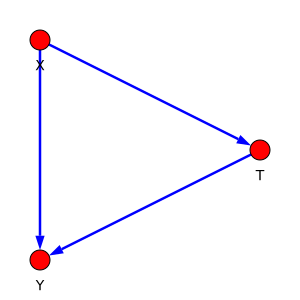

In [5]:
import causaleffect
from IPython.display import display, Math


G = causaleffect.createGraph(['T->Y', 'X->T', 'X->Y'])

print('Plotting graph...')
causaleffect.plotGraph(G)

In [6]:
print('Deriving identification formula using causal effect package...')
P = causaleffect.ID({'Y'}, {'T'}, G)
string = P.printLatex()
print('\n String for identification formula:  ', string)

split_by = 'P'
s =  [split_by+e for e in string.split(split_by) if e]

s_updated = []

for term in s:
    if 'sum' in term and (term[0].split('\\')[0] == 'P'):
        mod = s[0].split('\\')
        s_updated.append('\\' + mod[1])
    else:
        s_updated.append(term)

print('\n List of terms for parsing:  ', s_updated)

print('\n Plotting latex...')
display(Math(string))

Deriving identification formula using causal effect package...

 String for identification formula:   \sum_{x}P(x)P(y|t, x)

 List of terms for parsing:   ['\\sum_{x}', 'P(x)', 'P(y|t, x)']

 Plotting latex...


<IPython.core.display.Math object>

## Derive the Influence Function

In [22]:
est = "sum_S P(x)P(y|t, x)"

In [23]:

def nominator_parse(est):
    [nominator, denominator] = est.split('/')
    nominator_terms = nominator.split("P")

    # Parse the nominator:
    nominator_list = [None]*(len(nominator_terms)-1)
    i = 0
    nominator_uncond_count = 0
    for term in nominator_terms[1:]:
        a_b = term.split("|")
        if len(a_b) == 1: # this means that set b is empty. Refer to the part where we defined \delta(b)/P(b)=1 for this case.
            nominator_list[i] = '\\frac{\\delta' + a_b[0] + ')}{P' + a_b[0] + ')}'
            nominator_uncond_count += 1
        else:
            [a,b] = [a_b[0], a_b[1]]
            ab = a + ',' + b
            nominator_list[i] = '\\frac{\\delta' + ab + '}{P' + ab + ')}-\\frac{\\delta(' + b + '}{P(' + b + '}'
        i += 1
    return nominator_list

def denominator_parse(est):
    denominator_terms = denominator.split("P")[1:]

    # Parse the denominator:
    denominator_list = [None]*len(denominator_terms)
    i = 0
    denominator_uncond_count = 0
    for term in denominator_terms:
        c_d = term.split("|")
        if len(c_d) == 1: # this means that set d is empty. Refer to the part where we defined \delta(d)/P(d)=1 for this case.
            denominator_list[i] = '\\frac{\\delta' + c_d[0] + ')}{P' + c_d[0] + ')}'
            denominator_uncond_count += 1
        else:
            [c,d] = [c_d[0], c_d[1]]
            cd = c + ',' + d
            denominator_list[i] = '\\frac{\\delta' + ab + '}{P' + ab + ')}-\\frac{\\delta(' + b + '}{P(' + b + '}'
        i += 1
    return denominator_list

def IF_derivation(est):
    
    nom_list = nominator_parse(est)
    denom_list = denominator_parse(est)
    IF_nom = "+".join(nom_list)
    IF_denom = "+".join(nom_list)
    
    return est + '[(' + IF_nom + ') - (' + IF_denom + ')]'
    
IF = IF_derivation(est)

ValueError: not enough values to unpack (expected 2, got 1)